In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import json
import time

In [59]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support.ui import Select
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support import expected_conditions as EC
import random

def get_page(year):
    print("Opening with year ", year)
    options = Options()
    #options.add_argument('--headless')
    options.add_argument('--javascript-enabled')
    driver = webdriver.Chrome(options=options,keep_alive=True)
    #url = 'https://www.ssa.gov/cgi-bin/popularnames.cgi'
    url = 'https://www.ssa.gov/oact/babynames/'
    try:
        driver.get(url)
    except:
        return True,None
    
    time.sleep(10)
    try:
        driver.find_elements(By.NAME,'year')[0].clear()
        driver.find_elements(By.NAME,'year')[0].send_keys(year)
    except:
        driver.find_elements(By.NAME,'year').clear()
        driver.find_elements(By.NAME,'year').send_keys(year)
        
    try:
        Select(driver.find_elements(By.NAME,'top')[0]).select_by_value('1000')
        driver.find_elements(By.ID,'number')[0].click()
    except:
        Select(driver.find_elements(By.NAME,'top')).select_by_value('1000')
        driver.find_elements(By.ID,'number').click()

    print("Clicked on all of the options successfully")
    time.sleep(15)
    print("connecting")
    
    driver.find_elements(By.XPATH,'//*[@id="content"]/section[4]/div/div/div[1]/form/p[3]/input[1]')[0].click()
    try:
        time.sleep(10)
        element_present = WebDriverWait(driver, random.randint(5,15)).until(EC.presence_of_element_located((By.ID, "yob")))
        print("Page is ready!")
        return False,BeautifulSoup(driver.page_source,'html.parser')
    except TimeoutException:
        print("Loading took too much time!")
        driver.quit()
        time.sleep(random.randint(5,15))
        return True,None


data_dict = {'rank':[],'male':[],'count_male':[],'female':[],'count_female':[],'year':[]}
for years in range(1900,2023):
    year = str(years)
    checkpoint = True
    while checkpoint:
        checkpoint,soup = get_page(year)
    print(year)
    for i in range(4,len(soup.find_all('tr')),5):
        data_dict['rank'].append(str(soup.find_all('td')[i]).replace('<td>','').replace('</td>',''))
        data_dict['male'].append(str(soup.find_all('td')[i+1]).replace('<td>','').replace('</td>',''))
        data_dict['count_male'].append(str(soup.find_all('td')[i+2]).replace('<td>','').replace('</td>',''))
        data_dict['female'].append(str(soup.find_all('td')[i+3]).replace('<td>','').replace('</td>',''))
        data_dict['count_female'].append(str(soup.find_all('td')[i+4]).replace('<td>','').replace('</td>',''))
        data_dict['year'].append(year)
    print(pd.DataFrame(data_dict).tail(5))
df = pd.DataFrame(data_dict)

Opening with year  1900
Clicked on all of the options successfully
connecting
Loading took too much time!
Opening with year  1900
Clicked on all of the options successfully
connecting
Page is ready!
1900
    rank      male count_male   female count_female  year
196  197    Jasper         97   Sophia          259  1900
197  198    Roscoe         96     Nell          256  1900
198  199      Levi         95  Cecilia          249  1900
199  200  Nicholas         95  Augusta          245  1900
200  201   Sherman         95    Selma          239  1900
Opening with year  1901
Clicked on all of the options successfully
connecting
Page is ready!
1901
    rank     male count_male    female count_female  year
397  197    Claud         72     Belle          208  1901
398  198  Clayton         72     Eliza          207  1901
399  199     Ross         72     Josie          205  1901
400  200    Simon         72      Nell          205  1901
401  201     Adam         71  Veronica          199  1901
Op

Clicked on all of the options successfully
connecting
Page is ready!
1918
     rank    male count_male     female count_female  year
3814  197    Adam        653       Cleo        1,009  1918
3815  198   Billy        645  Constance          971  1918
3816  199  Johnny        644    Laverne          965  1918
3817  200   Alton        642        May          961  1918
3818  201    Pete        638      Ollie          956  1918
Opening with year  1919
Clicked on all of the options successfully
connecting
Page is ready!
1919
     rank    male count_male    female count_female  year
4015  197     Jay        637    Claire          953  1919
4016  198   Ellis        634   Laverne          944  1919
4017  199   Alton        630  Angelina          940  1919
4018  200  Emmett        629     Carol          932  1919
4019  201    Pete        628     Effie          929  1919
Opening with year  1920
Clicked on all of the options successfully
connecting
Page is ready!
1920
     rank    male count_male

Clicked on all of the options successfully
connecting
Loading took too much time!
Opening with year  1934
Opening with year  1934
Clicked on all of the options successfully
connecting
Page is ready!
1934
     rank       male count_male     female count_female  year
7030  197        Rex        631      Flora          908  1934
7031  198       Alex        623    Rosalie          901  1934
7032  199    Wendell        618       Opal          892  1934
7033  200  Alexander        616       Nora          888  1934
7034  201       Ivan        612  Rosemarie          886  1934
Opening with year  1935
Clicked on all of the options successfully
connecting
Loading took too much time!
Opening with year  1935
Clicked on all of the options successfully
connecting
Loading took too much time!
Opening with year  1935
Clicked on all of the options successfully
connecting
Loading took too much time!
Opening with year  1935
Clicked on all of the options successfully
connecting
Loading took too much time!


Clicked on all of the options successfully
connecting
Page is ready!
1947
     rank     male count_male    female count_female  year
9643  197   Carlos      1,032     Sandy        1,354  1947
9644  198  Willard      1,025  Veronica        1,353  1947
9645  199     Jeff      1,007       Ida        1,347  1947
9646  200   Morris      1,003    Stella        1,335  1947
9647  201    Elmer        997   Harriet        1,324  1947
Opening with year  1948
Clicked on all of the options successfully
connecting
Loading took too much time!
Opening with year  1948
Clicked on all of the options successfully
connecting
Page is ready!
1948
     rank     male count_male   female count_female  year
9844  197   Rickey      1,020  Yolanda        1,365  1948
9845  198  Maurice      1,002    Renee        1,362  1948
9846  199   Sidney        991    Hazel        1,348  1948
9847  200    Perry        981     Faye        1,345  1948
9848  201    Edgar        976   Stella        1,344  1948
Opening with year  1

Clicked on all of the options successfully
connecting
Page is ready!
1963
      rank     male count_male  female count_female  year
12859  197    Alvin      1,502  Dianne        1,897  1963
12860  198    Jason      1,502   Tanya        1,847  1963
12861  199  Maurice      1,491  Audrey        1,798  1963
12862  200     Andy      1,482  Doreen        1,798  1963
12863  201     Leon      1,477   Irene        1,760  1963
Opening with year  1964
Clicked on all of the options successfully
connecting
Page is ready!
1964
      rank     male count_male   female count_female  year
13060  197    Marty      1,445   Audrey        1,867  1964
13061  198      Bob      1,433   Glenda        1,861  1964
13062  199     Doug      1,409   Doreen        1,832  1964
13063  200    Kenny      1,403  Felicia        1,832  1964
13064  201  Herbert      1,392    Traci        1,832  1964
Opening with year  1965
Clicked on all of the options successfully
connecting
Loading took too much time!
Opening with year  1

Clicked on all of the options successfully
connecting
Page is ready!
1980
      rank      male count_male    female count_female  year
16276  197     Tommy      1,259      Kate        1,329  1980
16277  198      Dale      1,237       Ana        1,325  1980
16278  199    Marvin      1,226    Melody        1,317  1980
16279  200  Geoffrey      1,224  Caroline        1,313  1980
16280  201     Steve      1,220     Diane        1,287  1980
Opening with year  1981
Clicked on all of the options successfully
connecting
Page is ready!
1981
      rank      male count_male    female count_female  year
16477  197      Dale      1,248  Kristine        1,360  1981
16478  198  Geoffrey      1,245    Shawna        1,359  1981
16479  199  Fernando      1,241    Rhonda        1,356  1981
16480  200      Ross      1,240      Toni        1,350  1981
16481  201     Pedro      1,228  Cristina        1,347  1981
Opening with year  1982
Clicked on all of the options successfully
connecting
Page is ready!
198

Clicked on all of the options successfully
connecting
Page is ready!
1998
      rank       male count_male    female count_female  year
19894  197      Edwin      1,703    Jordyn        1,583  1998
19895  198  Sebastian      1,697   Cameron        1,565  1998
19896  199      Micah      1,692      Kyra        1,565  1998
19897  200      Pedro      1,672  Brooklyn        1,558  1998
19898  201      Dante      1,670    Ashlyn        1,548  1998
Opening with year  1999
Clicked on all of the options successfully
connecting
Page is ready!
1999
      rank    male count_male    female count_female  year
20095  197   Jonah      1,710    Cierra        1,573  1999
20096  198    Cory      1,703   Mckenna        1,571  1999
20097  199  Darius      1,703     April        1,554  1999
20098  200   Jakob      1,692   Kirsten        1,533  1999
20099  201  Tyrese      1,692  Patricia        1,532  1999
Opening with year  2000
Clicked on all of the options successfully
connecting
Page is ready!
2000
    

Page is ready!
2011
      rank      male count_male   female count_female  year
22507  197     Peter      1,838   Aniyah        1,587  2011
22508  198    Damien      1,832    Allie        1,578  2011
22509  199  Harrison      1,829   Willow        1,575  2011
22510  200   Greyson      1,794  Miranda        1,568  2011
22511  201     Avery      1,790   Melody        1,561  2011
Opening with year  2012
Clicked on all of the options successfully
connecting
Page is ready!
2012
      rank     male count_male  female count_female  year
22708  197      Kai      1,938  Hayden        1,614  2012
22709  198   Collin      1,933  Adalyn        1,609  2012
22710  199     Omar      1,921   Megan        1,560  2012
22711  200    Jayce      1,917   Allie        1,550  2012
22712  201  Bennett      1,911  Alayna        1,549  2012
Opening with year  2013
Clicked on all of the options successfully
connecting
Loading took too much time!
Opening with year  2013
Clicked on all of the options successfully
c

In [118]:
df.to_csv('NameTrends.csv')

In [119]:
df = pd.read_csv('NameTrends.csv',index_col=[0])

In [120]:
df

,rank,male,count_male,female,count_female,year
0,1,John,"9,829",Mary,"16,705",1900
1,2,William,"8,579",Helen,"6,342",1900
2,3,James,"7,245",Anna,"6,114",1900
3,4,George,"5,403",Margaret,"5,304",1900
4,5,Charles,"4,098",Ruth,"4,765",1900
...,...,...,...,...,...,...
24718,197,Tucker,"1,930",Gemma,"1,505",2022
24719,198,Emilio,"1,905",Kylie,"1,498",2022
24720,199,Knox,"1,898",Molly,"1,481",2022
24721,200,Xander,"1,898",Blake,"1,447",2022


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24723 entries, 0 to 24722
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   rank          24723 non-null  int64 
 1   male          24723 non-null  object
 2   count_male    24723 non-null  object
 3   female        24723 non-null  object
 4   count_female  24723 non-null  object
 5   year          24723 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.3+ MB


In [122]:
df[['rank','year']] = df[['rank','year']].astype(int)

In [123]:
df[['count_male','count_female']] = df[['count_male','count_female']].apply(lambda x: x.str.replace(',','')).astype(int)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24723 entries, 0 to 24722
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   rank          24723 non-null  int32 
 1   male          24723 non-null  object
 2   count_male    24723 non-null  int32 
 3   female        24723 non-null  object
 4   count_female  24723 non-null  int32 
 5   year          24723 non-null  int32 
dtypes: int32(4), object(2)
memory usage: 965.7+ KB


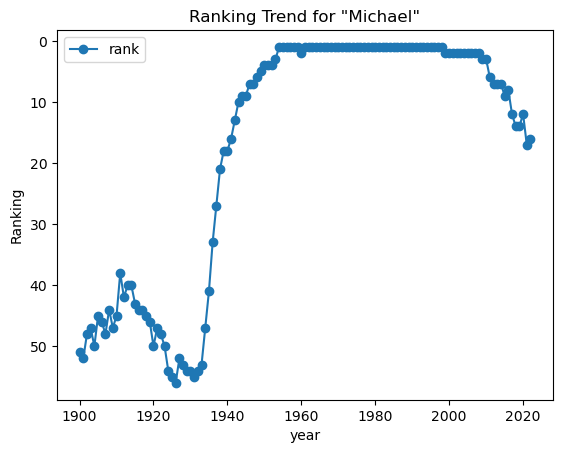

In [126]:
df[df['male']=='Michael'].plot(kind='line',x='year',y='rank',marker='o')
plt.ylabel('Ranking')
plt.title('Ranking Trend for "Michael"')
plt.gca().invert_yaxis()

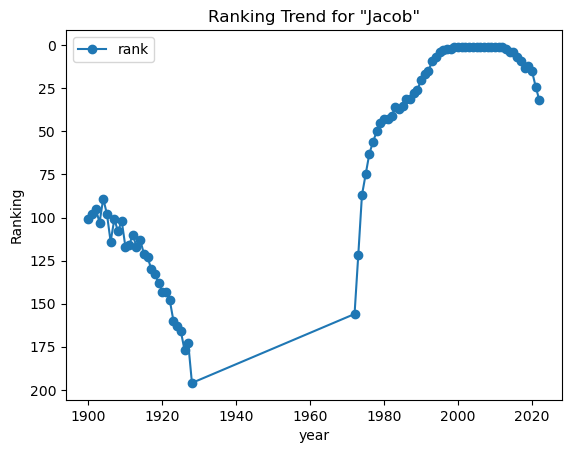

In [127]:
df[df['male']=='Jacob'].plot(kind='line',x='year',y='rank',marker='o')
plt.ylabel('Ranking')
plt.title('Ranking Trend for "Jacob"')
plt.gca().invert_yaxis()

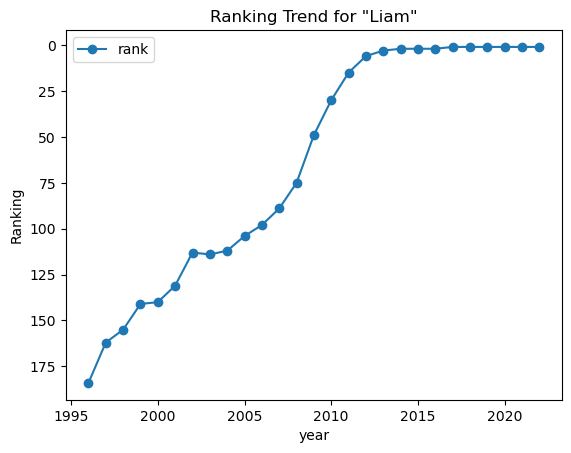

In [128]:
df[df['male']=='Liam'].plot(kind='line',x='year',y='rank',marker='o')
plt.ylabel('Ranking')
plt.title('Ranking Trend for "Liam"')
plt.gca().invert_yaxis()

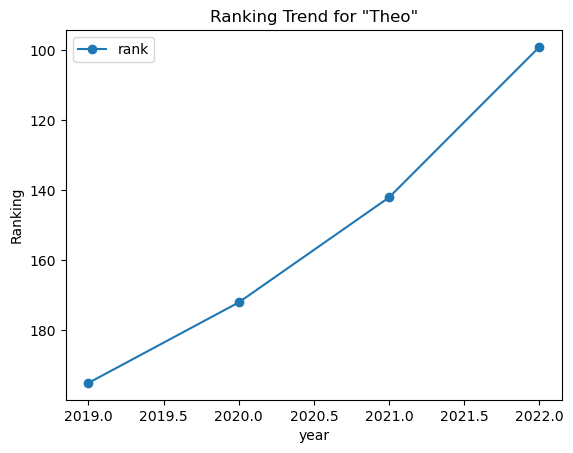

In [129]:
df[df['male']=='Theo'].plot(kind='line',x='year',y='rank',marker='o')
plt.ylabel('Ranking')
plt.title('Ranking Trend for "Theo"')
plt.gca().invert_yaxis()

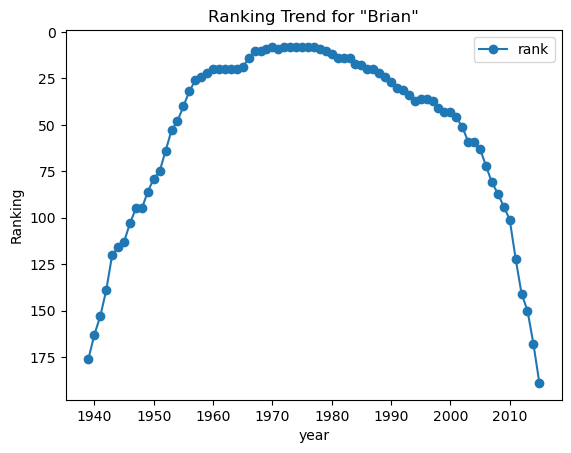

In [130]:
df[df['male']=='Brian'].plot(kind='line',x='year',y='rank',marker='o')
plt.ylabel('Ranking')
plt.title('Ranking Trend for "Brian"')
plt.gca().invert_yaxis()

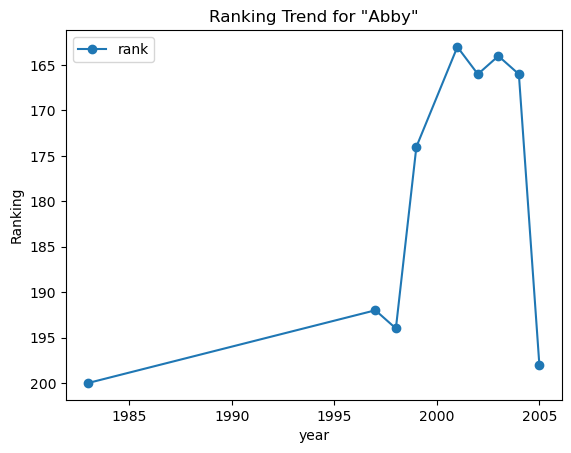

In [131]:
df[df['female']=='Abby'].plot(kind='line',x='year',y='rank',marker='o')
plt.ylabel('Ranking')
plt.title('Ranking Trend for "Abby"')
plt.gca().invert_yaxis()